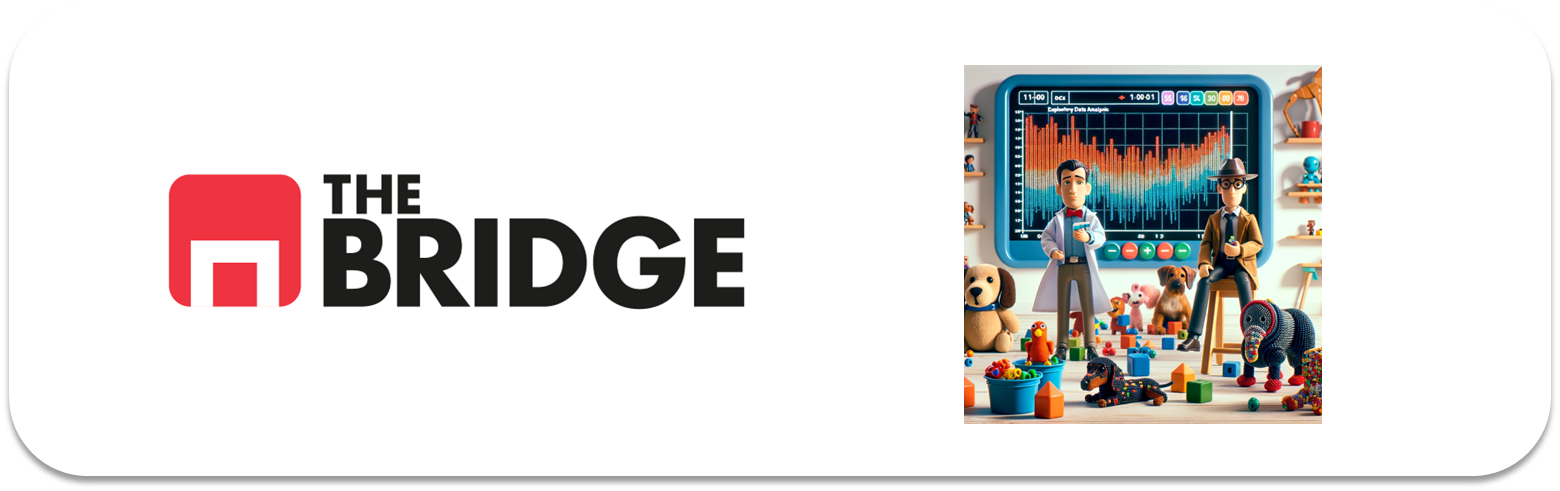

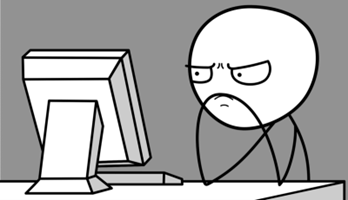

Para ejercitarte y afianzar lo aprendido sobre el estudio estadístico de las relaciones entre variables, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos se subirá a lo largo del sprint.

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from bootcampviztools import *
from scipy.stats import chi2_contingency
from scipy.stats import mannwhitneyu
from scipy import stats
from scipy.stats import pearsonr

### Ejercicio 1

Carga el dataset de admisiones que conoces de la unidad anterior y que se encuentra en la ruta "./data/admission_data.csv", deshazte de las columnas innecesarias

In [8]:
df_adm = pd.read_csv("./data/admission_data.csv")
df_adm.drop(["Unnamed: 0","Year"], axis=1, inplace=True)
df_adm.head(8)

,Major,Gender,Admission
0,School of Medicine,F,Rejected
1,Department of Economics,M,Accepted
2,Other,F,Accepted
3,Other,M,Accepted
4,Other,M,Rejected
5,Other,M,Rejected
6,Department of Psychology,F,Accepted
7,Other,M,Accepted


### Ejercicio 2

Si recuerdas, las variables "Admission" y "Major" parecían tener una relación clara (la distribución de ratio de admisión variaba claramente entre departamentos o "Majors"). Utiliza el estadístico adecuado (para variables categóricas entre sí, Chi-2) para comprobar que esa hipótesis de relación es estadísticamente significativa, tal y como lo hemos hecho en el workout

In [29]:
tabla_contingencia = pd.crosstab(df_adm['Admission'], df_adm['Major']).T
tabla_contingencia

Admission,Accepted,Rejected
Major,,
Department of Economics,370,215
Department of Mechanical Engineering,269,523
Department of Physics and Astronomy,914,332
Department of Psychology,47,667
Other,3164,4760
School of Medicine,321,597
School of Political Science and International Relations,147,437


In [ ]:
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2, "\n")
print("P-Value:", p, "\n")
print("Grados de Libertad:", dof, "\n")
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 1102.8608443982157 

P-Value: 5.0157639171796e-235 

Grados de Libertad: 6 

Tabla de Frecuencias Esperadas:
 [[ 239.81195644  345.18804356]
 [ 324.66849487  467.33150513]
 [ 510.77897046  735.22102954]
 [ 292.69356734  421.30643266]
 [3248.32468855 4675.67531145]
 [ 376.32030087  541.67969913]
 [ 239.40202147  344.59797853]]


### Ejercicio 3

Repite el ejercicio anterior para las variables "Admission" y "Gender".

In [28]:
tabla_contingencia2 = pd.crosstab(df_adm['Admission'], df_adm['Gender'])
tabla_contingencia2

Gender,F,M
Admission,,
Accepted,1494,3738
Rejected,2827,4704


In [ ]:
chi2, p, dof, expected = chi2_contingency(tabla_contingencia2)


print("Valor Chi-Cuadrado:", chi2, "\n")
print("P-Value:", p, "\n")
print("Grados de Libertad:", dof, "\n")
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 110.84892145390278 

P-Value: 6.385628329926473e-26 

Grados de Libertad: 1 

Tabla de Frecuencias Esperadas:
 [[1771.32899788 3460.67100212]
 [2549.67100212 4981.32899788]]


### Ejercicio 4

Carga el dataset de propinas (tips) que conoces de la unidad anterior y que se encuentra en la ruta , deshazte de las columnas innecesarias

In [35]:
df_tips = pd.read_csv("./data/tips.csv")
df_tips.drop(["Unnamed: 0", "total_bill", "smoker", "day", "time"], axis=1, inplace=True)
df_tips

,tip,sex,size
0,1.01,Female,2
1,1.66,Male,3
2,3.50,Male,3
3,3.31,Male,2
4,3.61,Female,4
...,...,...,...
239,5.92,Male,3
240,2.00,Female,2
241,2.00,Male,2
242,1.75,Male,2


### Ejercicio 5

Comprueba si la hipótesis "No existe una relación entre la propina dejada y el sexo del cliente" tiene confirmación estadística significativa. Para ello emplea el test que creas conveniente a la relación entre las variables "tip" y "sex"(recuerda que aquí disponemos de tres test: t-student, prueba U de Mann-Whitney u el análisis ANOVA).

In [43]:
grupo_a = df_tips.loc[df_tips.sex == "Male"]["tip"]
grupo_b = df_tips.loc[df_tips.sex == "Female"]["tip"]

u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)  # Test de prueba U de Mann-Whitney

print("Estadístico U:", u_stat)
print("Valor p:", p_valor)

Estadístico U: 7289.5
Valor p: 0.38335449359363927


### Ejercicio 6

Repite el ejercicio anterior para "tip" y "size" considerando esta última como "categórica". Haz el analisis bivariante visual previo.

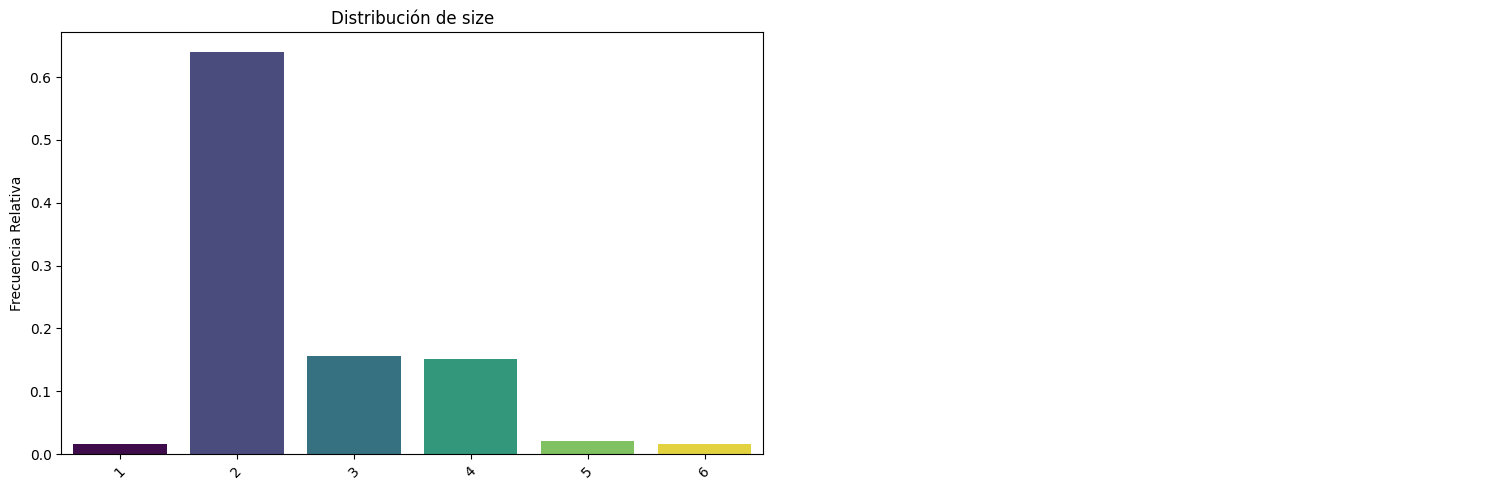

In [49]:
pinta_distribucion_categoricas(df_tips,["size"], relativa= True)

(2,)


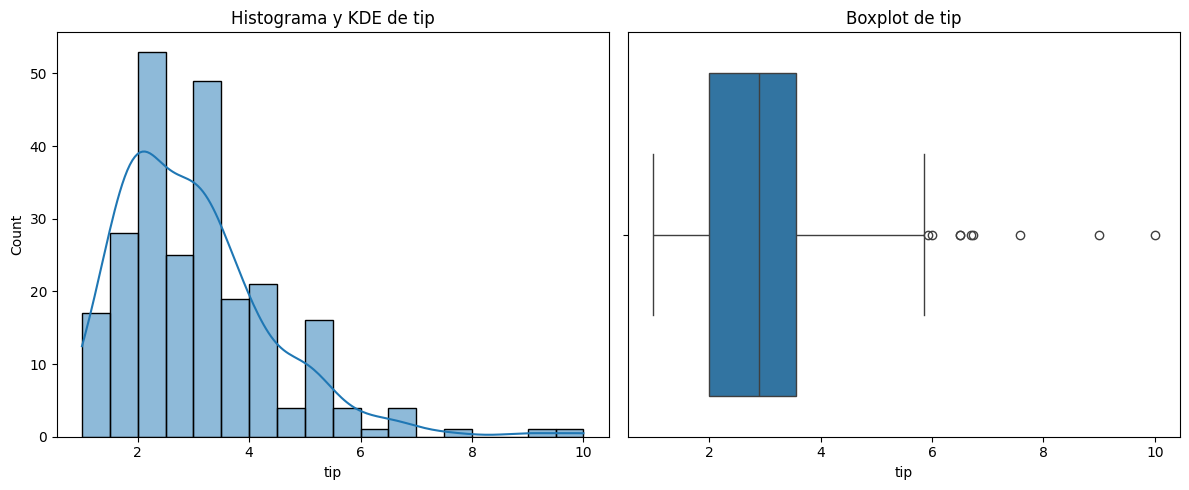

In [50]:
plot_combined_graphs(df_tips, ["tip"])

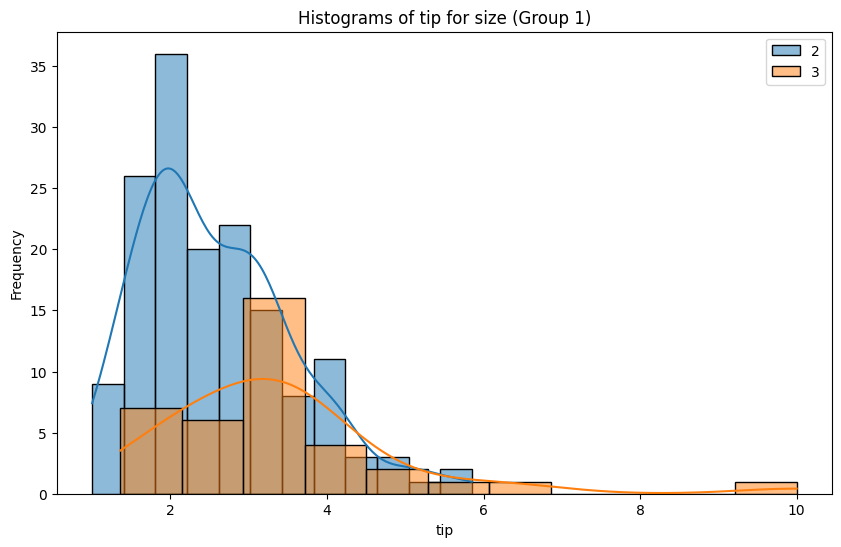

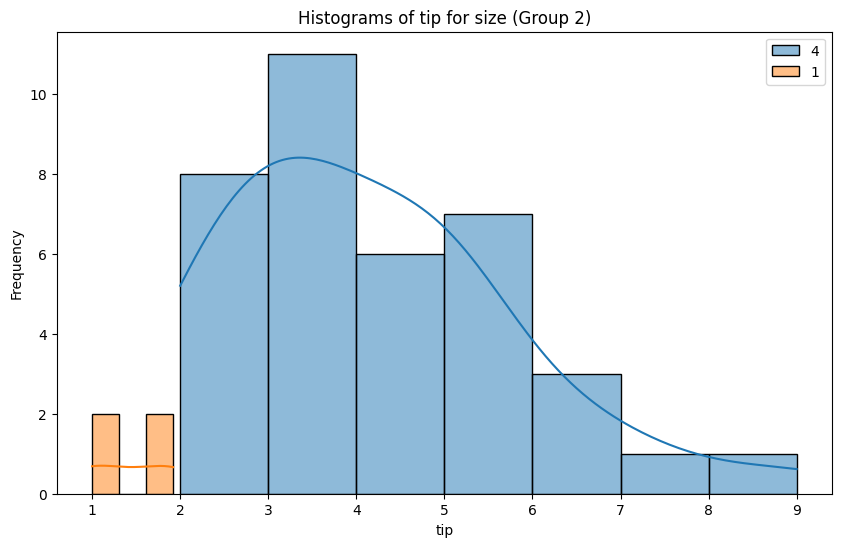

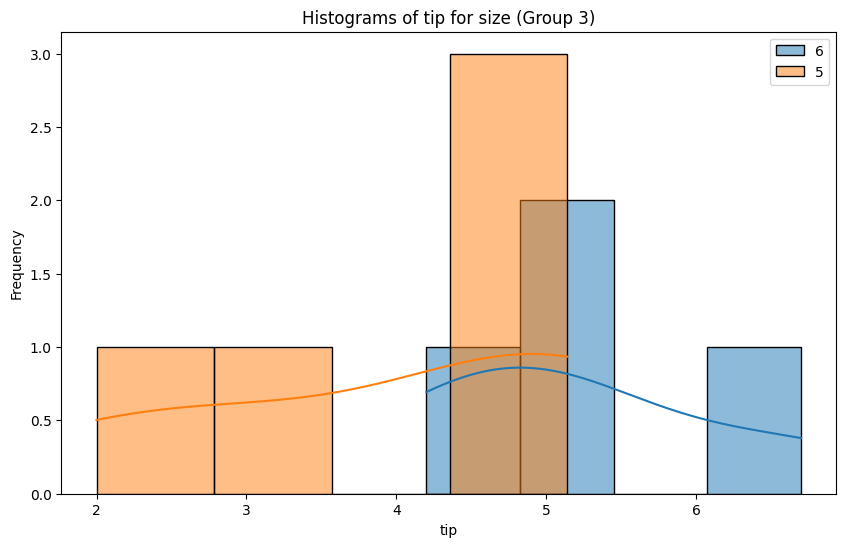

In [56]:
plot_grouped_histograms(df_tips, "size","tip",group_size= 2)

In [48]:
grupos = df_tips['size'].unique()  # Obtener los valores únicos de la columna categórica, en este caso el size de la mesa
tip_por_size = [df_tips[df_tips['size'] == grupo]['tip'] for grupo in grupos] # obtenemos los tips por size de la mesa y los incluimos en una lista
tip_por_size

[0      1.01
 3      3.31
 6      2.00
 8      1.96
 9      3.23
        ... 
 237    1.17
 240    2.00
 241    2.00
 242    1.75
 243    3.00
 Name: tip, Length: 156, dtype: float64,
 1       1.66
 2       3.50
 16      1.67
 17      3.71
 18      3.50
 19      3.35
 35      3.60
 36      2.00
 37      3.07
 38      2.31
 39      5.00
 40      2.24
 48      2.05
 64      2.64
 65      3.15
 71      3.00
 102     2.50
 112     4.00
 114     4.00
 129     2.18
 146     1.36
 152     2.74
 162     2.00
 165     3.48
 170    10.00
 182     3.50
 186     3.50
 188     3.50
 189     4.00
 200     4.00
 205     3.23
 206     3.41
 210     2.00
 214     6.50
 223     3.00
 231     3.00
 238     4.67
 239     5.92
 Name: tip, dtype: float64,
 4      3.61
 5      4.71
 7      3.12
 11     5.00
 13     3.00
 23     7.58
 25     2.34
 31     2.50
 33     2.45
 44     5.60
 47     6.00
 52     5.20
 54     4.34
 56     3.00
 59     6.73
 63     3.76
 77     4.00
 85     5.17
 95     4.73
 116    5

In [ ]:
f_val, p_val = stats.f_oneway(*tip_por_size) # El método * (igual que cuando vimos *args hace mil años) 
                                             # lo que hace es separar todos los elementos de la lista y pasarselos como argumento a la función
print("Valor F:", f_val)
print("Valor p:", p_val)

Valor F: 15.746330672727057
Valor p: 2.1694633916208874e-13


### Ejercicio 7

Considera ahora "size" como numérica, muestra el diagrama de dispersión con correlación entre "size" y "tip" y luego aplicales el test para saber si el coeficiente de pearson es estadísticamente significativo. ¿Qué más observas?

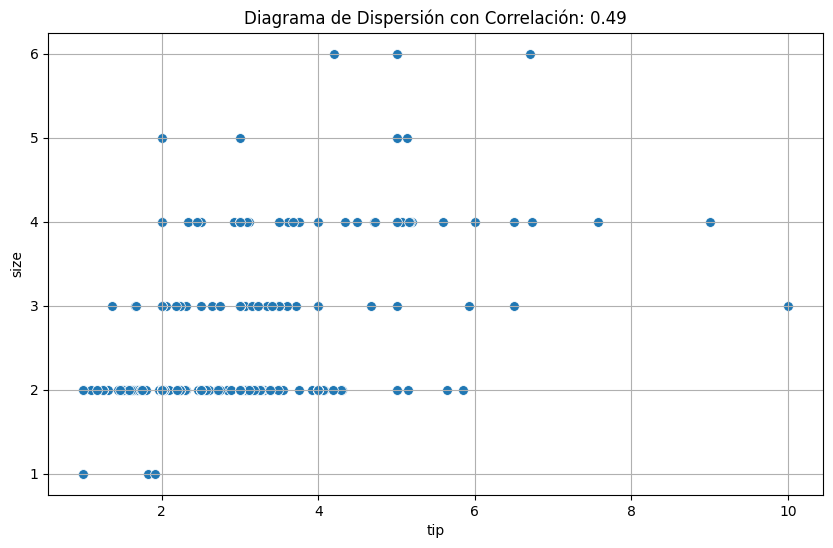

In [63]:
grafico_dispersion_con_correlacion(df_tips,"tip","size", 50, mostrar_correlacion = True)

In [65]:
correlation, p_value = pearsonr(df_tips["size"], df_tips["tip"])

print(f"Coeficiente de correlación: {round(correlation,2)}")
print(f"P-value: {round(p_value,8)}")

Coeficiente de correlación: 0.49
P-value: 0.0
